# Análise Exploratória dos Dados  
Agora que adquirimos os dados, vamos partir para análise exploratória e verificar a integridade dos dados também.

In [1]:
# Importando as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

pd.options.display.float_format = "{:,.2f}".format

In [29]:
TITLE_FONT = {'fontsize': 18, 'weight': 'bold',}

In [2]:
# Importando os dados
df = pd.read_parquet('../data/financial-data.parquet')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,"9,839.64",C1231006815,"170,136.00","160,296.36",M1979787155,0.00,0.00,0,0
1,1,PAYMENT,"1,864.28",C1666544295,"21,249.00","19,384.72",M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,"21,182.00",0.00,1,0
4,1,PAYMENT,"11,668.14",C2048537720,"41,554.00","29,885.86",M1230701703,0.00,0.00,0,0


In [3]:
df.index

RangeIndex(start=0, stop=1500000, step=1)

## Verificando dados faltantes

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500000 entries, 0 to 1499999
Data columns (total 11 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1500000 non-null  int64  
 1   type            1500000 non-null  object 
 2   amount          1500000 non-null  float64
 3   nameOrig        1500000 non-null  object 
 4   oldbalanceOrg   1500000 non-null  float64
 5   newbalanceOrig  1500000 non-null  float64
 6   nameDest        1500000 non-null  object 
 7   oldbalanceDest  1500000 non-null  float64
 8   newbalanceDest  1500000 non-null  float64
 9   isFraud         1500000 non-null  int64  
 10  isFlaggedFraud  1500000 non-null  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 125.9+ MB


Não existem dados nulos

## Verificando a variável target

In [5]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,"1,500,000.00","1,500,000.00","1,500,000.00","1,500,000.00","1,500,000.00","1,500,000.00","1,500,000.00","1,500,000.00"
mean,59.15,"160,829.64","867,460.72","888,257.11","989,385.37","1,114,851.99",0.00,0.00
std,50.93,"267,660.37","2,951,754.60","2,988,125.99","2,301,935.27","2,406,375.82",0.03,0.00
min,1.00,0.10,0.00,0.00,0.00,0.00,0.00,0.00
25%,17.00,"12,988.44",0.00,0.00,0.00,0.00,0.00,0.00
50%,38.00,"78,028.89","15,286.00",0.00,"133,626.51","224,440.36",0.00,0.00
75%,130.00,"216,230.95","125,777.86","167,023.76","936,451.51","1,152,678.68",0.00,0.00
max,143.00,"10,000,000.00","38,939,424.03","38,946,233.02","42,207,404.59","42,207,404.59",1.00,0.00


In [6]:
df['isFraud'].value_counts(normalize=True) * 100

0   99.89
1    0.11
Name: isFraud, dtype: float64

Como esperado a variável target está muito desbalanceado, com apenas 0,11% de fraude.  
Na modelagem será verificado a melhor forma de contornar esse problema.

In [7]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,"9,839.64",C1231006815,"170,136.00","160,296.36",M1979787155,0.00,0.00,0,0
1,1,PAYMENT,"1,864.28",C1666544295,"21,249.00","19,384.72",M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,"21,182.00",0.00,1,0
4,1,PAYMENT,"11,668.14",C2048537720,"41,554.00","29,885.86",M1230701703,0.00,0.00,0,0


## Verificando as Features

### Type

In [8]:
df['type'].value_counts().sort_values(ascending=False)

CASH_OUT    535211
PAYMENT     502308
CASH_IN     328503
TRANSFER    123993
DEBIT         9985
Name: type, dtype: int64

In [9]:
df_type_ordered = df.sort_values(by='type', ascending=False).copy()

In [10]:
df_type_ordered

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
258520,14,TRANSFER,"83,304.61",C1849472116,0.00,0.00,C1210929525,"332,730.60","416,035.21",0,0
882965,42,TRANSFER,"179,817.91",C558833408,0.00,0.00,C1569006508,"858,207.55","1,038,025.46",0,0
572518,24,TRANSFER,"875,847.75",C1206642984,0.00,0.00,C257229326,"5,616,736.95","6,492,584.69",0,0
882962,42,TRANSFER,"387,521.79",C115303301,0.00,0.00,C65098329,"573,021.61","1,310,251.50",0,0
1048515,95,TRANSFER,"169,285.09",C969909855,"140,856.00",0.00,C1753252271,0.00,"169,285.09",0,0
...,...,...,...,...,...,...,...,...,...,...,...
818649,40,CASH_IN,"3,928.18",C351161366,"21,515.00","25,443.18",C358227421,"1,215,784.09","1,211,855.90",0,0
818643,40,CASH_IN,"180,135.27",C487276447,"231,593.00","411,728.27",C130685659,0.00,0.00,0,0
818627,40,CASH_IN,"229,902.43",C921389747,"942,585.04","1,172,487.47",C375861708,0.00,0.00,0,0
818620,40,CASH_IN,"211,381.67",C384438998,"13,432.00","224,813.67",C814270414,"557,695.58","346,313.91",0,0


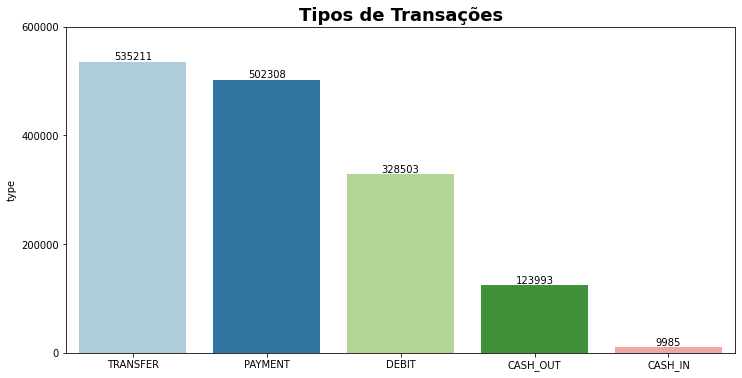

In [30]:
plt.figure(figsize=(12, 6))
plt.title('Tipos de Transações', fontdict=TITLE_FONT)

ax = sns.barplot(x=df_type_ordered['type'].unique(), y=df_type_ordered['type'].value_counts(), palette='Paired')
for container in ax.containers:
    ax.bar_label(container)

plt.yticks(np.arange(0, 6e5+1, 2e5))

plt.show()

Os tipos de transação mais frequente são de transferencia e pagamento.  
Será que podemos observar esse mesmo comportamento entre as fraudes?

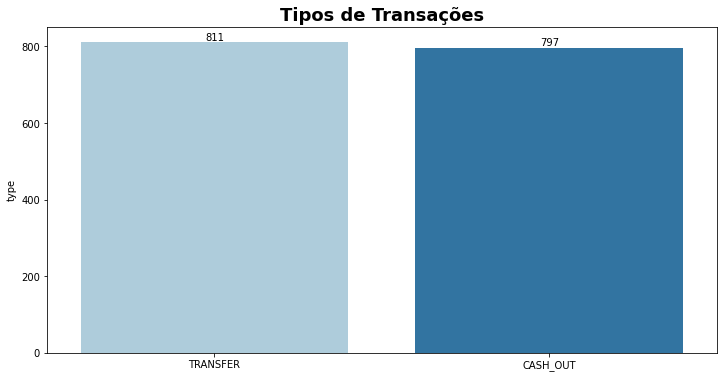

In [31]:
only_fraud = df_type_ordered.query('isFraud==1').copy()

plt.figure(figsize=(12, 6))
plt.title('Tipos de Transações', fontdict=TITLE_FONT)

ax = sns.barplot(x=only_fraud['type'].unique(), y=only_fraud['type'].value_counts(), palette='Paired')
for container in ax.containers:
    ax.bar_label(container)

plt.yticks(np.arange(0, 1000, 200))

plt.show()

Uma grande surpresa: só temos fraudes em casos de transferências e saques.  
Dessa forma, na fase de modelagem podemos manter somente esses dois tipos de movimetanções.

In [13]:
transf_type = ['TRANSFER', 'CASH_OUT']

df_filtered = df.query('type in @transf_type').copy()

df_filtered.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,"21,182.00",0.00,1,0
15,1,CASH_OUT,"229,133.94",C905080434,"15,325.00",0.00,C476402209,"5,083.00","51,513.44",0,0
19,1,TRANSFER,"215,310.30",C1670993182,705.00,0.00,C1100439041,"22,425.00",0.00,0,0
24,1,TRANSFER,"311,685.89",C1984094095,"10,835.00",0.00,C932583850,"6,267.00","2,719,172.89",0,0


In [14]:
df_filtered['isFraud'].value_counts(normalize=True) * 100

0   99.76
1    0.24
Name: isFraud, dtype: float64

### Amount

In [15]:
df_filtered.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,"659,204.00","659,204.00","659,204.00","659,204.00","659,204.00","659,204.00","659,204.00","659,204.00"
mean,59.21,"271,477.09","54,334.34","21,176.07","1,505,833.66","1,834,182.12",0.00,0.00
std,51.02,"353,639.98","209,897.11","135,436.45","2,708,975.10","2,831,213.53",0.05,0.00
min,1.00,0.37,0.00,0.00,0.00,0.00,0.00,0.00
25%,17.00,"86,909.74",0.00,0.00,"125,743.54","340,815.98",0.00,0.00
50%,38.00,"178,940.89",286.00,0.00,"556,436.14","866,673.78",0.00,0.00
75%,131.00,"318,524.40","31,957.00",0.00,"1,675,147.69","2,112,130.08",0.00,0.00
max,143.00,"10,000,000.00","19,887,819.06","13,796,061.54","42,169,156.09","42,207,404.59",1.00,0.00


In [16]:
df_filtered['amount'].min()

0.37

In [17]:
df_filtered['amount'].max()

10000000.0

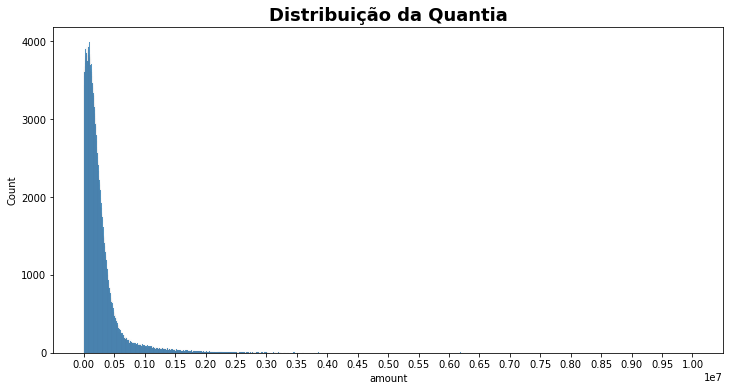

In [33]:
plt.figure(figsize=(12, 6))
plt.title('Distribuição da Quantia', fontdict=TITLE_FONT)
sns.histplot(data=df_filtered, x='amount', bins=5000)
plt.xticks(np.arange(0, 1e7+1, 500000))
plt.yticks(np.arange(0, 4001, 1000))

plt.show()

Vemos aqui uma distribuição distorcida à direita, o que indica que a maior porção das transações são de quantias baixas.  
O menor valor encontrado dentro do dataset foi de $0,37 e o maior de $10M, um espaçamento considerável.

In [34]:
df_filtered

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,"21,182.00",0.00,1,0
15,1,CASH_OUT,"229,133.94",C905080434,"15,325.00",0.00,C476402209,"5,083.00","51,513.44",0,0
19,1,TRANSFER,"215,310.30",C1670993182,705.00,0.00,C1100439041,"22,425.00",0.00,0,0
24,1,TRANSFER,"311,685.89",C1984094095,"10,835.00",0.00,C932583850,"6,267.00","2,719,172.89",0,0
...,...,...,...,...,...,...,...,...,...,...,...
1499923,143,TRANSFER,"561,483.35",C1444576742,0.00,0.00,C348049529,"1,306,825.35","1,770,314.58",0,0
1499924,143,TRANSFER,"196,751.21",C1001986271,"30,199.00",0.00,C1134680331,"138,715.26","335,466.46",0,0
1499932,143,TRANSFER,"17,900.69",C486733099,"104,815.00","86,914.31",C1121989629,"530,387.42","548,288.11",0,0
1499970,143,TRANSFER,"317,982.84",C1943461768,"20,909.00",0.00,C429511913,"2,194.63","258,791.43",0,0


### Name (Conta de origem e destino)  
Vamos verificar as colunas de conta origem (nameOrig) e destino (nameDest).

In [43]:
print('Quantidade de registro no dataset: {:,}'.format(df_filtered.shape[0]))
print('Quantidade de conta origem único: {:,}'.format(df_filtered['nameOrig'].nunique()))
print('Quantidade de conta origem destino: {:,}'.format(df_filtered['nameDest'].nunique()))


Quantidade de registro no dataset: 659,204
Quantidade de conta origem único: 659,080
Quantidade de conta origem destino: 122,393


Agora quero verificar se existem casos de transações que em que as contas origem e destino são as mesmas, e se isso pode ser um indicador de fraude ou não.

In [46]:
df_filtered.query('nameOrig == nameDest')

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
